In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('BlackFriday.csv')

In [5]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172


In [7]:
del df['Product_Category_2']
del df['Product_Category_3']

In [9]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,7172


<Axes: >

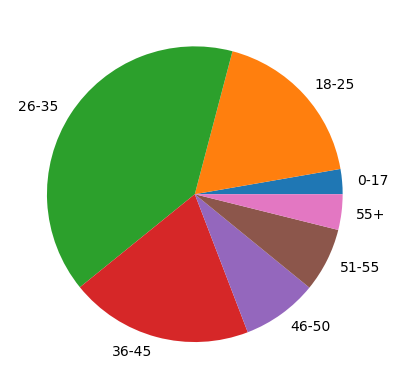

In [67]:
df.groupby('Age').size().plot( kind = 'pie')

<Axes: xlabel='Age'>

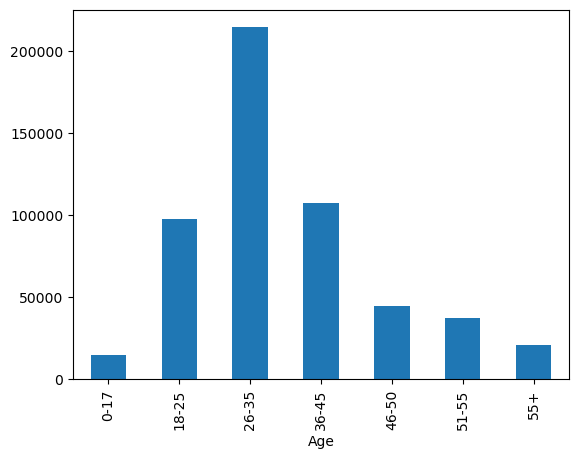

In [11]:
df.groupby('Age').size().plot( kind = 'bar')

<Axes: xlabel='Age'>

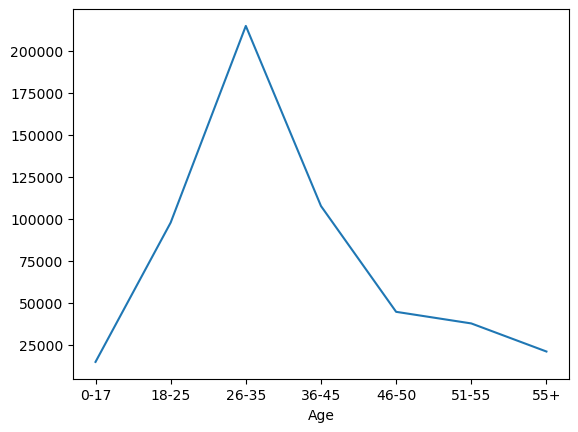

In [13]:
df.groupby('Age').size().plot( kind = 'line')

<Axes: ylabel='Frequency'>

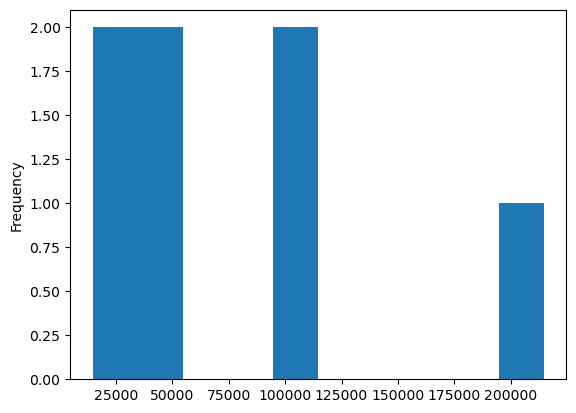

In [15]:
df.groupby('Age').size().plot( kind = 'hist')

In [17]:
df['Age']

0          0-17
1          0-17
2          0-17
3          0-17
4           55+
          ...  
537572    36-45
537573    36-45
537574    36-45
537575    36-45
537576    36-45
Name: Age, Length: 537577, dtype: object

In [19]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [21]:
for i in df['Age'].unique():
    print(i ,":", len(df[df['Age'] == i]))


0-17 : 14707
55+ : 20903
26-35 : 214690
46-50 : 44526
51-55 : 37618
36-45 : 107499
18-25 : 97634


In [23]:
len(df['Age'] == '0-17')

537577

In [25]:
df[df['Age'] == i]['Product_ID'].nunique()

3213

In [27]:
for i in df['Age'].unique():
    print(i ,":", df[df['Age'] == i]['Product_ID'].nunique())


0-17 : 2300
55+ : 2573
26-35 : 3419
46-50 : 3099
51-55 : 2877
36-45 : 3318
18-25 : 3213


In [29]:
lst = []
for i in df['Age'].unique():
    lst.append([i , df[df['Age'] == i]['Product_ID'].nunique()])


In [31]:
data = pd.DataFrame(lst, columns = ['Age', 'Products'])

In [33]:
data

,Age,Products
0,0-17,2300
1,55+,2573
2,26-35,3419
3,46-50,3099
4,51-55,2877
5,36-45,3318
6,18-25,3213


<Axes: xlabel='Age'>

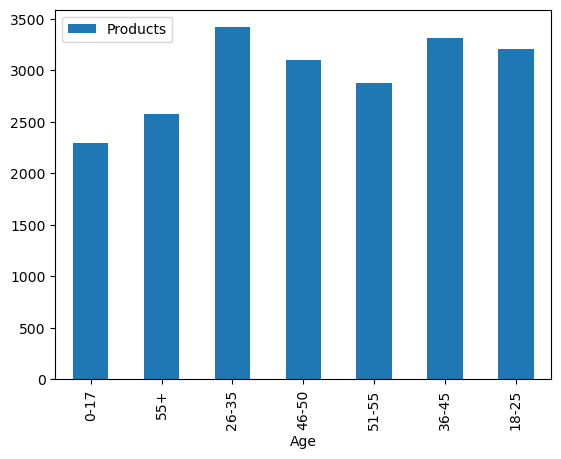

In [35]:
data.plot.bar( x = 'Age' )

<Axes: xlabel='Age', ylabel='Products'>

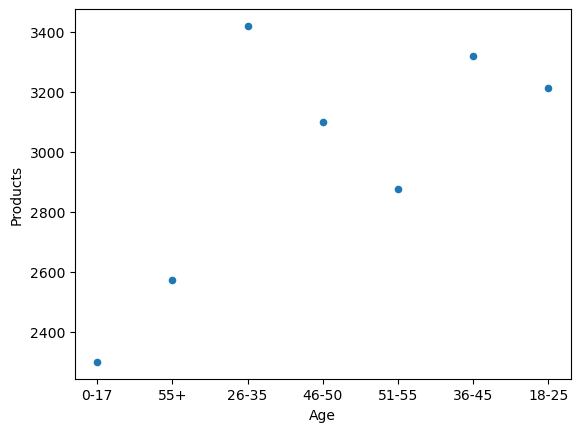

In [37]:
data.plot.scatter( x = 'Age' , y = 'Products' )

# heat map

Heatmap showing average purchase amount by Age and Product Category

In [41]:
purchase_by_age_category = df.pivot_table(
    values='Purchase',
    index='Age',
    columns='Product_Category_1',
    aggfunc='mean'
)

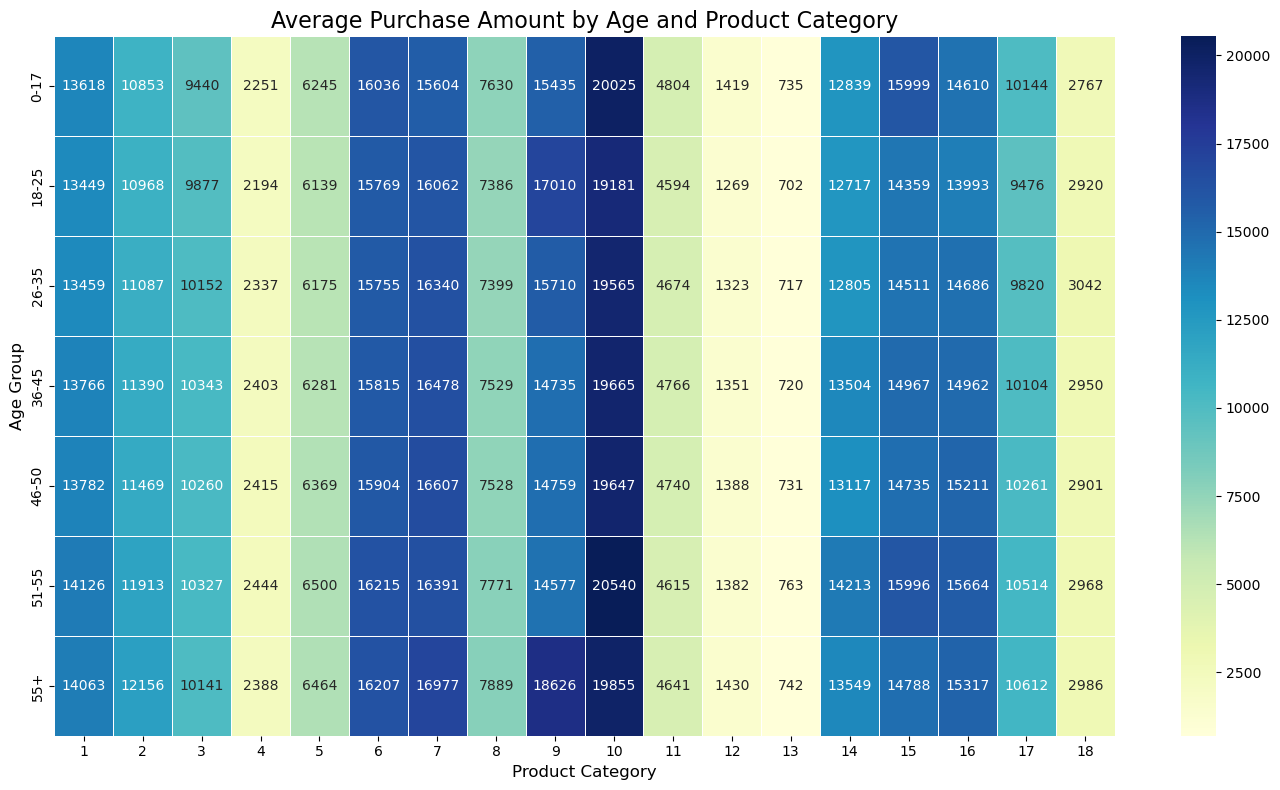

In [43]:
plt.figure(figsize=(14, 8))
sns.heatmap(purchase_by_age_category, cmap='YlGnBu', annot=True, fmt='.0f', linewidths=0.5)
plt.title('Average Purchase Amount by Age and Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Age Group', fontsize=12)
plt.tight_layout()
plt.savefig('heatmap_age_category.png', dpi=300, bbox_inches='tight')
plt.show()

 Heatmap showing average purchase by City Category and Stay In Current City Years

In [46]:
purchase_by_city_stay = df.pivot_table(
    values='Purchase',
    index='City_Category',
    columns='Stay_In_Current_City_Years',
    aggfunc='mean'
)

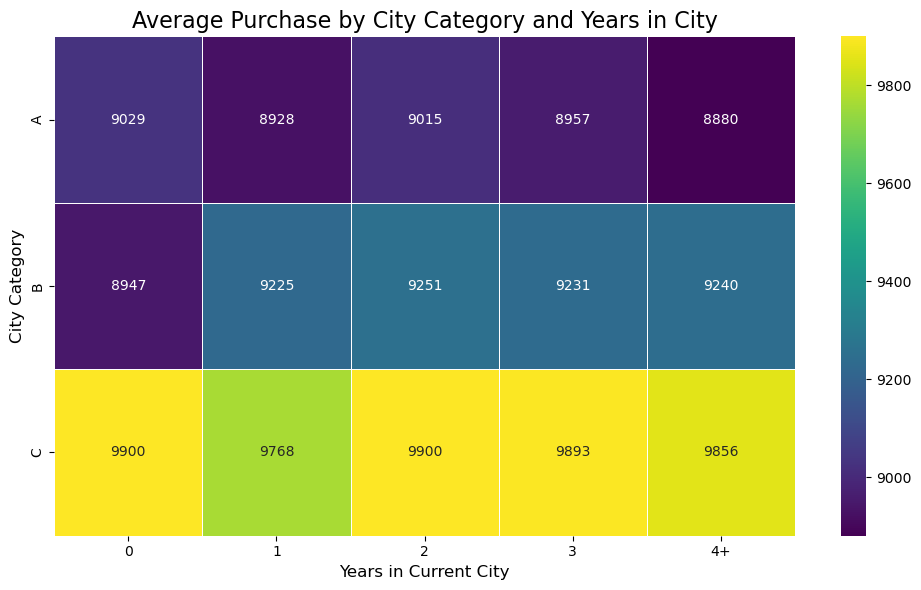

In [48]:
plt.figure(figsize=(10, 6))
sns.heatmap(purchase_by_city_stay, cmap='viridis', annot=True, fmt='.0f', linewidths=0.5)
plt.title('Average Purchase by City Category and Years in City', fontsize=16)
plt.xlabel('Years in Current City', fontsize=12)
plt.ylabel('City Category', fontsize=12)
plt.tight_layout()
plt.savefig('heatmap_city_stay.png', dpi=300, bbox_inches='tight')
plt.show()

# pair plot

In [61]:
numerical_cols = ['Age', 'Occupation', 'Marital_Status', 'Product_Category_1', 'Purchase']
print("Missing values in selected columns:")
print(df[numerical_cols].isnull().sum())

df_clean = df[numerical_cols].dropna()

Missing values in selected columns:
Age                   0
Occupation            0
Marital_Status        0
Product_Category_1    0
Purchase              0
dtype: int64


In [63]:
sample_df = df_clean.sample(n=1000, random_state=42)


<Figure size 1200x1000 with 0 Axes>

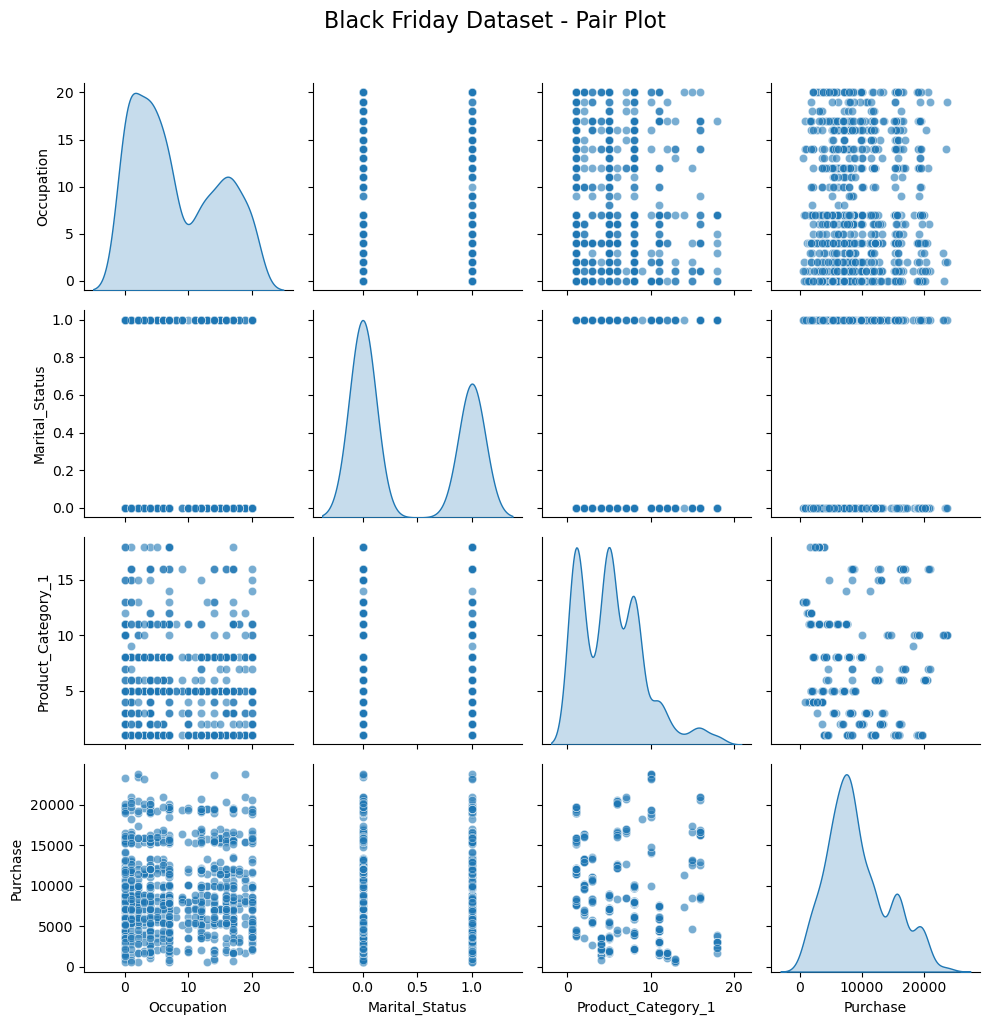

In [65]:
plt.figure(figsize=(12, 10))
pairplot = sns.pairplot(sample_df, diag_kind='kde', plot_kws={'alpha': 0.6})
pairplot.fig.suptitle('Black Friday Dataset - Pair Plot', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()
